In [37]:
%matplotlib inline

In [38]:
import matplotlib.pyplot as plt

In [39]:
import openTSNE

In [40]:
import numpy as np

In [41]:
from openTSNE import nearest_neighbors, affinity

In [42]:
data = np.random.random((1000, 10))

In [43]:
def step1(data,
          perplexity=30,
          method="approx",
          metric="euclidean",
          metric_params=None,
          symmetrize=True,
          n_jobs=8,
          random_state=None,
         ):
    n_samples = data.shape[0]
    #     perplexity = self.check_perplexity(perplexity)

    k_neighbors = min(n_samples - 1, int(3 * perplexity))
    knn_index, __neighbors, __distances = affinity.build_knn_index(
        data, method, k_neighbors, metric, metric_params, n_jobs, random_state
    )
    return knn_index, __neighbors, __distances

#         self.P = joint_probabilities_nn(
#             self.__neighbors,
#             self.__distances,
#             [self.perplexity],
#             symmetrize=symmetrize,
#             n_jobs=n_jobs,
#         )

In [44]:
%time knn_index, __neighbors, __distances = step1(data)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

CPU times: user 3.4 s, sys: 78.1 ms, total: 3.48 s
Wall time: 3.3 s


In [45]:
%time P = affinity.joint_probabilities_nn(__neighbors, __distances, [30], symmetrize=True, n_jobs=1,)

CPU times: user 51 ms, sys: 11.7 ms, total: 62.6 ms
Wall time: 103 ms


In [46]:
__neighbors

array([[915, 224, 584, ..., 405,  40, 946],
       [240, 112, 761, ...,  58,   8, 117],
       [317, 726, 760, ..., 303, 569, 283],
       ...,
       [111, 410, 196, ..., 966, 457, 373],
       [430, 129, 600, ..., 178, 503, 690],
       [365, 377, 705, ..., 310, 235, 360]])

In [47]:
__distances

array([[0.61397155, 0.62599491, 0.66575779, ..., 0.98840605, 0.98947653,
        0.98950973],
       [0.51083522, 0.59887325, 0.64032547, ..., 0.93648849, 0.93700096,
        0.93961901],
       [0.38601765, 0.52530663, 0.55058221, ..., 0.88709816, 0.88825245,
        0.8905243 ],
       ...,
       [0.67927412, 0.69841596, 0.70424379, ..., 1.07223092, 1.07249813,
        1.07323575],
       [0.44536169, 0.51448673, 0.55186029, ..., 0.94567182, 0.94585438,
        0.95041546],
       [0.42429231, 0.46080337, 0.481764  , ..., 0.86184275, 0.86356104,
        0.86421035]])

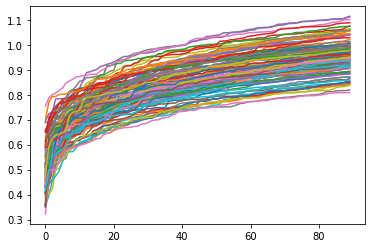

In [48]:
fig, ax = plt.subplots()
    
for line in __distances[:100]:
    ax.plot(line)

# mnist fashion

In [49]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [50]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
# X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [51]:
%time knn_index, __neighbors, __distances = step1(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

CPU times: user 3min 6s, sys: 2.9 s, total: 3min 9s
Wall time: 1min 3s


In [52]:
%time P = affinity.joint_probabilities_nn(__neighbors, __distances, [30], symmetrize=True, n_jobs=8)

CPU times: user 7.32 s, sys: 290 ms, total: 7.61 s
Wall time: 1.39 s


In [53]:
__neighbors.shape, __neighbors.dtype

((60000, 90), dtype('int64'))

In [54]:
__distances.dtype

dtype('float64')

In [55]:
from openTSNE import _tsne
import scipy.sparse as sp

In [56]:
def step2(neighbors,
          distances,
          perplexities,
          symmetrize=True,
          normalization="pair-wise",
          n_reference_samples=None,
          n_jobs=8
         ):
    
    #     assert normalization in (
    #         "pair-wise",
    #         "point-wise",
    #     ), f"Unrecognized normalization scheme `{normalization}`."

    n_samples, k_neighbors = distances.shape

    if n_reference_samples is None:
        n_reference_samples = n_samples

    # Compute asymmetric pairwise input similarities
    conditional_P = _tsne.compute_gaussian_perplexity(
        distances, np.array(perplexities, dtype=float), num_threads=n_jobs
    )
    conditional_P = np.asarray(conditional_P)

    P = sp.csr_matrix(
        (
            conditional_P.ravel(),
            neighbors.ravel(),
            range(0, n_samples * k_neighbors + 1, k_neighbors),
        ),
        shape=(n_samples, n_reference_samples),
    )

    # Symmetrize the probability matrix
    if symmetrize:
        P = (P + P.T) / 2

    if normalization == "pair-wise":
        P /= np.sum(P)
    elif normalization == "point-wise":
        P = sp.diags(np.asarray(1 / P.sum(axis=1)).ravel()) @ P

    return P

In [57]:
%time P = step2(__neighbors, __distances, [30], symmetrize=True, n_jobs=8)

CPU times: user 7.42 s, sys: 435 ms, total: 7.86 s
Wall time: 1.44 s


In [24]:
P

<60000x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 8417634 stored elements in Compressed Sparse Row format>

In [27]:
cond_P = _tsne.compute_gaussian_perplexity(__distances, np.array([30], dtype=float), num_threads=8)

In [29]:
cond_P.shape

(60000, 90)

In [59]:
P.indices

array([50815, 49881, 46381, ..., 49655, 40600, 11912], dtype=int32)